# SALES PREDICTION USING PYTHON

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
price = pd.read_csv("Advertising.csv")
print(price.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# DataType Info

In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# NULL Values

In [4]:
print(price.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
price.value_counts().head(5)

Unnamed: 0  TV     Radio  Newspaper  Sales
1           230.1  37.8   69.2       22.1     1
138         273.7  28.9   59.7       20.8     1
128         80.2   0.0    9.2        8.8      1
129         220.3  49.0   3.2        24.7     1
130         59.6   12.0   43.1       9.7      1
dtype: int64

# Data Visualization

# Correlation

<AxesSubplot:>

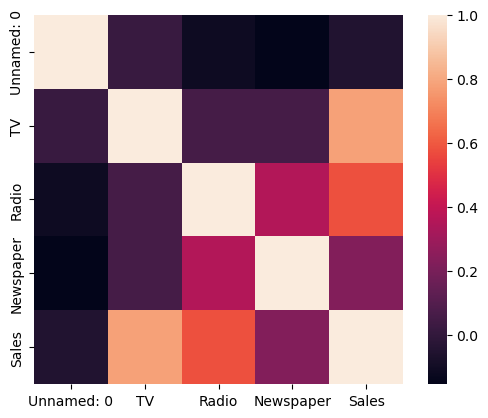

In [6]:
sns.heatmap(price.corr(), square=True)

# Linear Model Plot

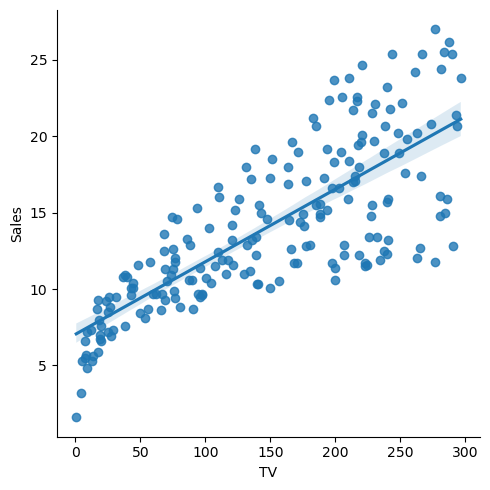

In [7]:
sns.lmplot(x='TV', y='Sales', data=price)

# TV Sales Plotting

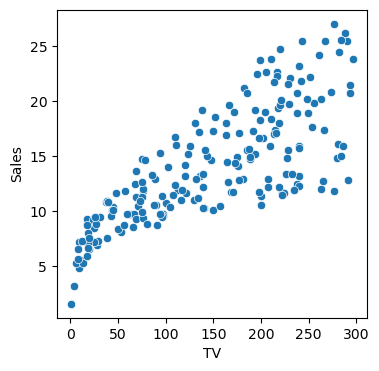

In [8]:
plt.figure(figsize=(4,4))
sns.scatterplot(data = price, x = price['TV'], y = price['Sales'])
plt.show()
     

# Radio Sales Plotting

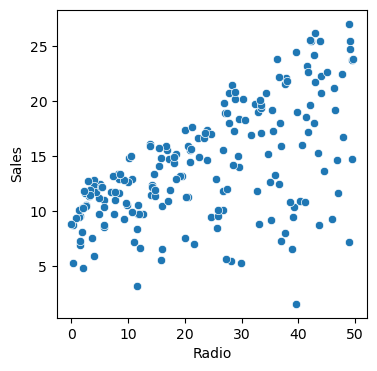

In [9]:
plt.figure(figsize=(4,4))
sns.scatterplot(data = price, x = price['Radio'], y = price['Sales'])
plt.show()

# Splitting of Data

In [10]:
X = price.drop(['Unnamed: 0','Sales'], axis=1)
Y = price['Sales']

In [11]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [15]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (140, 3)
X_Test Shape: (60, 3)
Y_Train Shape: (140, 3)
Y_Test Shape: (60,)


# Model Building
Creating the Model

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
print(model.coef_)
print(model.intercept_)

[ 0.04303172  0.19352212 -0.00386729]
3.4106415886118224


In [18]:
pred=model.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [20]:
print("Linear Regression")
print("Accuracy of the model: ", r2_score(Y_test, pred))

Linear Regression
Accuracy of the model:  0.8567790678044409


# Model Testing
Testing the Model

In [21]:
print('MAE: ', metrics.mean_absolute_error(pred,Y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(pred,Y_test)))
print('R-Squared: ', metrics.r2_score(pred,Y_test))

MAE:  1.7091210770106202
RMSE:  2.3182000750787872
R-Squared:  0.799727852559647


In [22]:
y_pred = model.predict(X_test)

In [25]:
act_predict= pd.DataFrame({
    'Actual': Y_test.values.flatten(), 
    'Predict': y_pred.flatten()})

act_predict.head(10)

,Actual,Predict
0,18.4,18.150362
1,7.2,12.958203
2,18.0,17.962819
3,25.5,23.486352
4,22.6,20.639434
5,14.6,14.300527
6,14.9,14.921565
7,23.7,21.297606
8,22.3,21.130349
9,9.3,12.765449


<AxesSubplot:>

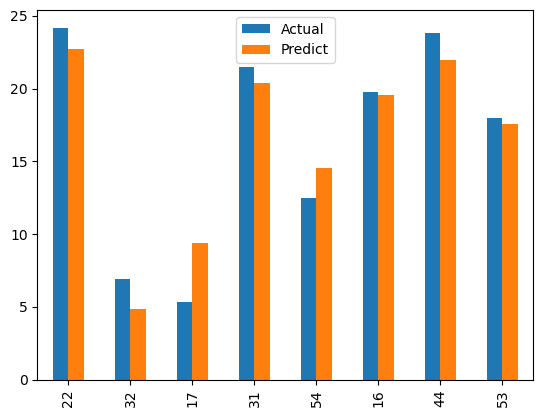

In [26]:
act_predict.sample(8).plot(kind='bar')

In [27]:
model.score(X_test, Y_test)

0.8567790678044409

# Saving Model

In [28]:
import pickle

In [29]:
filename = "Linear_Regression.pkl"
pickle.dump(model, open(filename, 'wb'))
print("Saved the Model")
     

Saved the Model
